In [1]:
from robustness import datasets, model_utils
import torch as ch
from torchvision import transforms
from utils import ModelDataset, RGBAToRGB, RGBAToRGBWithBackground
from colorsys import hsv_to_rgb

from robustness.tools.vis_tools import show_image_column, show_image_row
from robustness.tools.label_maps import CLASS_DICT

## Backgrounds 

In [2]:
BACKGROUND_PATH = '/data/theory/robustopt/shibani/synthfar/'
images, labels = ch.load(f'{BACKGROUND_PATH}/background_images.pt'), ch.load(f'{BACKGROUND_PATH}/background_labels.pt')

In [3]:
if False: 
    import torch.nn.functional as F
    import numpy as np
    im = F.interpolate(images[:1].clone(), size=(224, 224))
    print(im.shape)
    imp = transforms.functional.to_pil_image(im[0], mode='RGB')
    imp.putalpha(255)
    print(np.array(imp).shape)
    imp

In [4]:
ds = datasets.CIFAR("/scratch/datasets/SIMFAR-10/v1.2")
ds.custom_class = ModelDataset
ds.custom_class_args = {
    'early_stop': 1000
}
ds.transform_test = transforms.Compose([
                    RGBAToRGBWithBackground(backgrounds=images, labels=labels),
                    transforms.CenterCrop((40, 40)),
                    transforms.Resize(32),
                    transforms.ToTensor()
                ])

m, _ = model_utils.make_and_restore_model(arch='resnet50', dataset=ds, 
                                          resume_path='/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best')
m.eval()
pass

=> loading checkpoint '/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best'
=> loaded checkpoint '/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best' (epoch 190)


In [5]:
_, vl = ds.make_loaders(batch_size=10, workers=0, only_val=True)
vl_iter = iter(vl)

==> Preparing dataset cifar..


In [9]:
CLASS_DICT['CIFAR'][.item()]

NameError: name 'y' is not defined

In [8]:
x, y, u = next(vl_iter)
preds = m(x[:,:3,...].cuda())[0].argmax(1).cpu()
show_image_column([_x[None,...] for _x in x], [f"True: {CLASS_DICT['CIFAR'][_y.item()]} \n Pred: {CLASS_DICT['CIFAR'][_p.item()]}" for _y, _p in zip(y, preds)])

deer tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
import numpy as np

np.where(ch.tensor([1,2,3]) == 1)

## Original

In [5]:
ds = datasets.CIFAR("/scratch/datasets/SIMFAR-10/SIMFAR-10/v1.2")
ds.custom_class = ModelDataset
ds.custom_class_args = {
    'early_stop': 1000
}
ds.transform_test = transforms.Compose([
                    RGBAToRGB(hsv_to_rgb(0., 1., 0.1)),
                    transforms.CenterCrop((40, 40)),
                    transforms.Resize(32),
                    transforms.ToTensor()
                ])

m, _ = model_utils.make_and_restore_model(arch='resnet50', dataset=ds, 
                                          resume_path='/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best')
m.eval()
pass

=> loading checkpoint '/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best'
=> loaded checkpoint '/data/theory/robustopt/robust_models/cifar_nat/checkpoint.pt.best' (epoch 190)


In [6]:
_, vl = ds.make_loaders(batch_size=10, workers=0, only_val=True)
vl_iter = iter(vl)

==> Preparing dataset cifar..


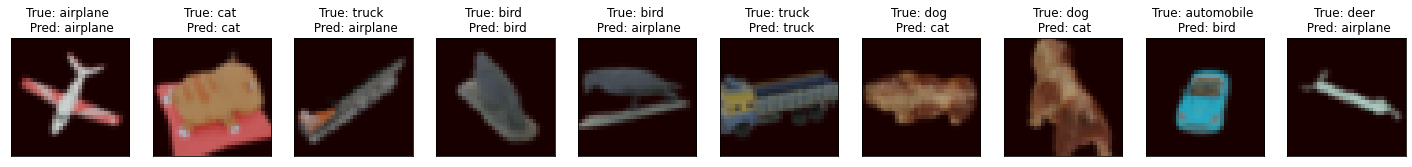

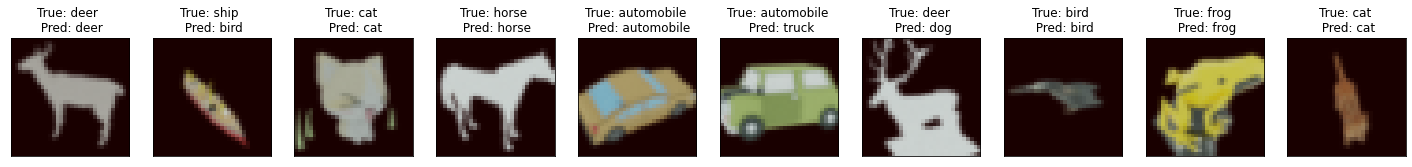

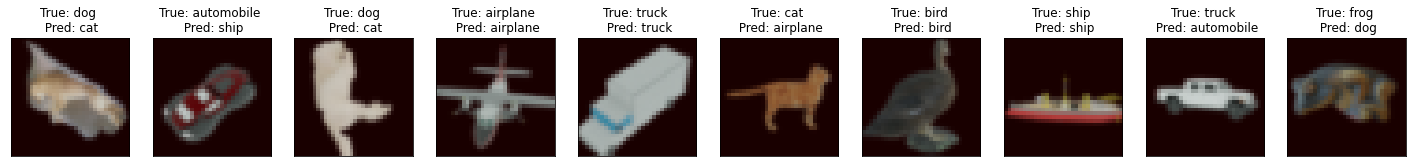

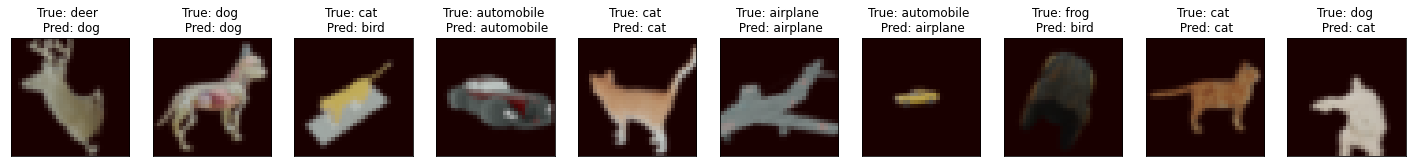

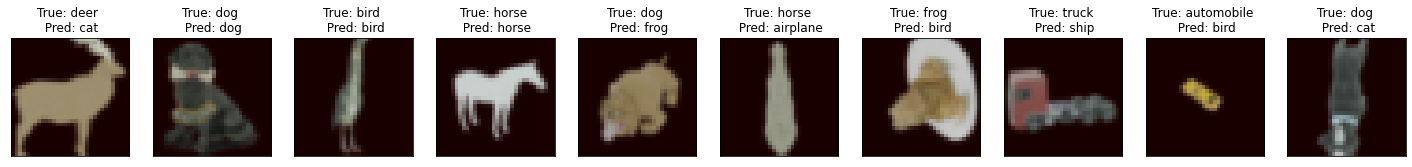

tensor(0.4600)


In [10]:
# Sanity check
corr, tot = 0., 0.
for _ in range(5):
    x, y, u = next(vl_iter)
    preds = m(x[:,:3,...].cuda())[0].argmax(1).cpu()
    corr += preds.eq(y).float().sum()
    tot += preds.shape[0]
    show_image_column([_x[None,...] for _x in x], [f"True: {CLASS_DICT['CIFAR'][_y.item()]} \n Pred: {CLASS_DICT['CIFAR'][_p.item()]}" for _y, _p in zip(y, preds)])
print(corr / tot)

In [ ]:
x.shape

In [ ]:
ds.transform_test

In [5]:
y

tensor([7, 7, 1, 4, 0, 2, 6, 2, 2, 2])